In [12]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(x, y):
    n = len(x)
    p = np.poly1d(0.0)
    for i in range(n):
        pt = np.poly1d([y[i]])
        for j in range(n):
            if i != j:
                fac = x[i] - x[j]
                pt *= np.poly1d([1.0, -x[j]]) / fac
        p += pt
    return p

a, b, n_train, n_test = 0, 15, 50, 50  

np.random.seed(0) 
x_all = np.random.uniform(a, b, n_train + n_test)
np.random.shuffle(x_all)

x_train = x_all[:n_train]
x_test = x_all[n_train:]
y_train = np.sin(x_train)
y_test = np.sin(x_test)

sorted_indices = np.argsort(x_train)
x_train = x_train[sorted_indices]
y_train = y_train[sorted_indices]

train_error = np.mean((np.array([lagrange(x_train, y_train) for x in x_train]) - y_train)**2)
print(f'Train error: {train_error}')

test_error = np.mean((np.array([lagrange(x_train, y_train) for x in x_test]) - y_test)**2)
print(f'Test error: {test_error}')


Train error: 442997198558582.0
Test error: 442997190878527.6


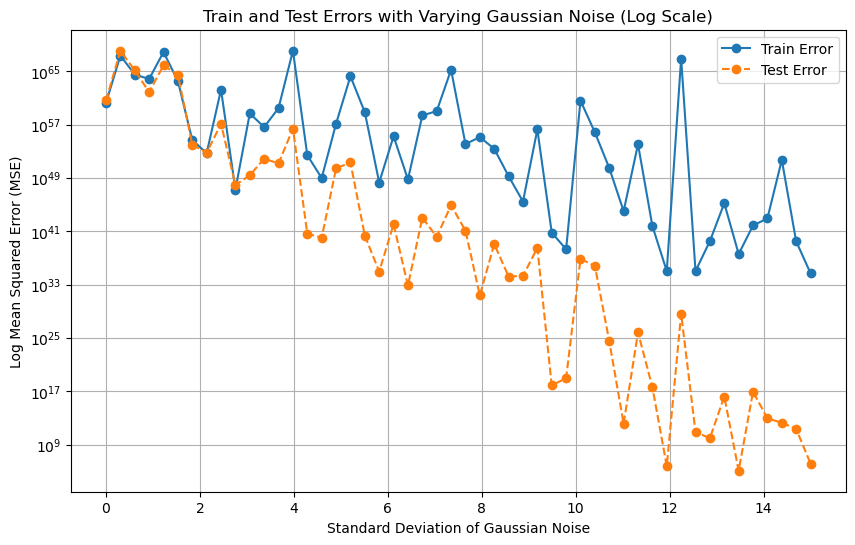

In [17]:
std_devs = np.linspace(0,15,50)  
train_errors = []
test_errors = []
for std_dev in std_devs:
    noise = np.random.normal(0, std_dev, 50)
    x_train_noisy = x_train + noise
    model_noisy = lagrange(x_train_noisy, y_train)
    
    train_error_noisy = np.mean((model_noisy(x_train_noisy) - y_train)**2)
    test_error_noisy = np.mean((model_noisy(x_test) - y_test)**2)
    
    train_errors.append(train_error_noisy)
    test_errors.append(test_error_noisy)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(std_devs, train_errors, label='Train Error', marker='o')
plt.plot(std_devs, test_errors, label='Test Error', marker='o', linestyle='dashed')
plt.xlabel('Standard Deviation of Gaussian Noise')
plt.yscale('log')  
plt.ylabel('Log Mean Squared Error (MSE)')
plt.title('Train and Test Errors with Varying Gaussian Noise (Log Scale)')
plt.legend()
plt.grid(True)
plt.savefig('Train and Test Errors with Varying Gaussian Noise (Log Scale)')
plt.show()
